In [1]:
import sys
sys.path.append('..')

import tiff_helpers
import tps_helper
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
test_tiff = tiff_helpers.read_tiff('/home/arimorcos/Github/stn_motion_correct/notebooks/original.tif', 0)

In [59]:
num_control_points = 64
grid_size = np.sqrt(num_control_points)
x_control_t, y_control_t = np.meshgrid(np.linspace(-1, 1, grid_size),
                                       np.linspace(-1, 1, grid_size))

In [4]:
x_offset = 0.5
y_offset = -0.1
control_points = np.vstack((x_control_t.flatten() + x_offset, y_control_t.flatten() + y_offset)).T
control_points.shape

(16, 2)

In [28]:
%%time
reload(tps_helper)
# x_s, y_s, x_d, y_d, round_vals, shifted = tps_helper.apply_tps_transform(test_tiff, control_points)
shifted = tps_helper.apply_tps_transform(test_tiff, control_points)

CPU times: user 524 ms, sys: 24 ms, total: 548 ms
Wall time: 529 ms


In [60]:
reload(tps_helper)
x_offset = np.random.normal(0, 0.05, size=num_control_points)
y_offset = np.random.normal(0, 0.05, size=num_control_points)
control_points = np.vstack((x_control_t.flatten() + x_offset, y_control_t.flatten() + y_offset)).T

shifted = tps_helper.apply_tps_transform(test_tiff, control_points)

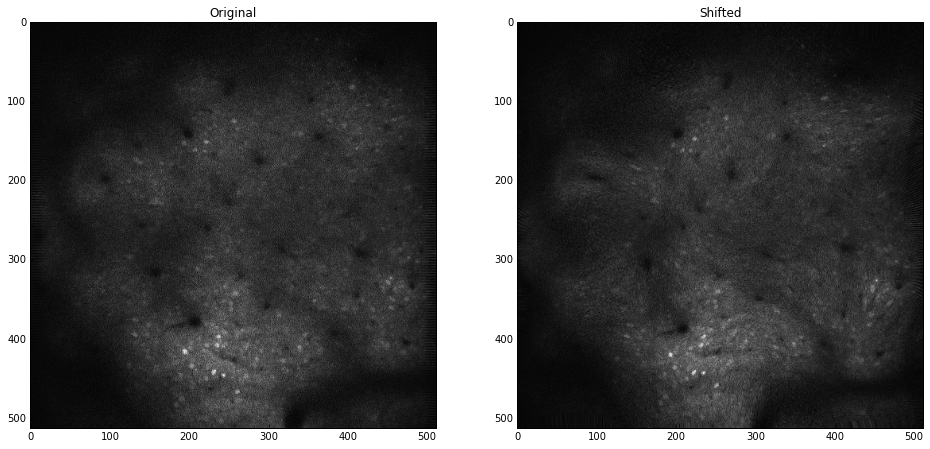

In [61]:
fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(121)
ax.imshow(test_tiff, cmap='gray');
ax.set_title('Original');
ax = fig.add_subplot(122)
ax.imshow(shifted, cmap='gray');
ax.set_title('Shifted');

In [70]:
x = np.random.normal(0, 1, size=(32, 2, 512, 512))

In [72]:
x[:, 0, :, :].shape

(32, 512, 512)